In [56]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score,classification_report
from sklearn.multiclass import BaseEstimator
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
pd.set_option('display.max_columns', None)
import os 
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
path="../../Data/"
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data_cleaning import processing_functions as pfs
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from src.data_cleaning import useful_viz
path="../../Data/"

### Once again we have our base with some gained insight so lets do some final cleaning

In [52]:
df = pd.read_csv('../../Data/training_set_values.csv',dtype={"permit":"object","public_meeting":"object"})
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
new_df=pfs.drop_unnecessary_feature_columns(df)
new_df

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type
0,6000.0,1390,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,0.0,1399,Lake Victoria,Mara,20,2,Serengeti,280,NaN,Other,True,2010,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,686,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,263,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
4,0.0,0,Lake Victoria,Kagera,18,1,Karagwe,0,True,NaN,True,0,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,Pangani,Kilimanjaro,3,5,Hai,125,True,Water Board,True,1999,gravity,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe
59396,4700.0,1212,Rufiji,Iringa,11,4,Njombe,56,True,VWC,True,1996,gravity,gravity,vwc,pay annually,soft,enough,river,communal standpipe
59397,0.0,0,Rufiji,Mbeya,12,7,Mbarali,0,True,VWC,False,0,swn 80,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump
59398,0.0,0,Rufiji,Dodoma,1,4,Chamwino,0,True,VWC,True,0,nira/tanira,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump


In [8]:
new_df.isna().sum()

amount_tsh                  0
gps_height                  0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
management                  0
payment                     0
water_quality               0
quantity                    0
source                      0
waterpoint_type             0
dtype: int64

### Cleaned up half of columns now to dig a little deeper

One column we are taking away is the remaining duplicates which would be extraction_type_group.

In [9]:
new_df.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [10]:
new_df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [11]:
new_df.gps_height.value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [12]:
new_df.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [13]:
new_df.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [14]:
new_df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [15]:
new_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [16]:
df.isna().sum()

amount_tsh                  0
gps_height                  0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
management                  0
payment                     0
water_quality               0
quantity                    0
source                      0
waterpoint_type             0
dtype: int64

### So originally we were going to drop a few columns but now I have a bit of a better picture as to how the data can be filled in with averages or measn such as with gps height but amount tsh there no plausible idea at this moment at time somthing to look into for a next step. Now that I have seen the data bit deeper I think I got a good feeling on what to drop.
id',
'date_recorded',
'recorded_by',
'wpt_name',
'scheme_name', '
num_private', '
subvillage', '
ard',
'extraction_type_class',
'management_group',
 'payment_type', 
'quality_group',
'quantity_group', 
'source_type',
 'source_class',
'waterpoint_type_group','
extraction_type_group',
"amount_tsh",
"management","
population"


In [17]:
df = pd.read_csv('../../Data/training_set_values.csv',dtype={"permit":"object","public_meeting":"object"})
#have to reload df to refresh columns for new cleaning module

In [18]:
useful_viz.js_drop_unnecessary_feature_columns(df)

,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,lga,public_meeting,scheme_management,permit,construction_year,extraction_type,payment,water_quality,quantity,source,waterpoint_type
0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,True,VWC,False,1999,gravity,pay annually,soft,enough,spring,communal standpipe
1,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,NaN,Other,True,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,True,VWC,True,2009,gravity,pay per bucket,soft,enough,dam,communal standpipe multiple
3,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,True,VWC,True,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
4,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,True,NaN,True,0,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,Hai,True,Water Board,True,1999,gravity,pay per bucket,soft,enough,spring,communal standpipe
59396,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,11,4,Njombe,True,VWC,True,1996,gravity,pay annually,soft,enough,river,communal standpipe
59397,NaN,0,NaN,34.017087,-8.750434,Rufiji,Mbeya,12,7,Mbarali,True,VWC,False,0,swn 80,pay monthly,fluoride,enough,machine dbh,hand pump
59398,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,1,4,Chamwino,True,VWC,True,0,nira/tanira,never pay,soft,insufficient,shallow well,hand pump


In [19]:
df.longitude.value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [20]:
df.latitude.value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [21]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Mtambo                       1
Pentecost                    1
Care Int                     1
Village Contributio          1
Bfwd                         1
Name: funder, Length: 1897, dtype: int64

In [22]:
df.installer.value_counts()


DWE               17402
Government         1825
RWE                1206
Commu              1060
DANIDA             1050
                  ...  
Africaone             1
ICAP                  1
RC church/CEFA        1
GRA TZ MUSOMA         1
Hesewa                1
Name: installer, Length: 2145, dtype: int64

Looks like everything checks out just got to fill the unknown catergorcials with unknown  and the na numericals with means or medians.

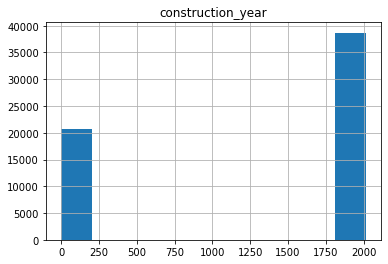

In [23]:
df.hist(column="construction_year");# def going median here just because very scewed data not sure if this is is the right call but we shall see

KNN this with long and lat 

(array([2.276e+03, 1.169e+03, 1.645e+03, 2.700e+03, 1.437e+03, 1.054e+03,
        4.730e+02, 7.950e+02, 9.850e+02, 1.095e+03, 1.657e+03, 1.537e+03,
        2.073e+03, 2.809e+03, 3.024e+03, 2.440e+03, 2.529e+03, 2.318e+03,
        1.812e+03, 1.217e+03, 7.820e+02, 5.540e+02, 3.850e+02, 4.340e+02,
        1.320e+02, 8.100e+01, 2.300e+01, 2.300e+01, 6.000e+00, 1.000e+00]),
 array([1.0000e+00, 9.3300e+01, 1.8560e+02, 2.7790e+02, 3.7020e+02,
        4.6250e+02, 5.5480e+02, 6.4710e+02, 7.3940e+02, 8.3170e+02,
        9.2400e+02, 1.0163e+03, 1.1086e+03, 1.2009e+03, 1.2932e+03,
        1.3855e+03, 1.4778e+03, 1.5701e+03, 1.6624e+03, 1.7547e+03,
        1.8470e+03, 1.9393e+03, 2.0316e+03, 2.1239e+03, 2.2162e+03,
        2.3085e+03, 2.4008e+03, 2.4931e+03, 2.5854e+03, 2.6777e+03,
        2.7700e+03]),
 <a list of 30 Patch objects>)

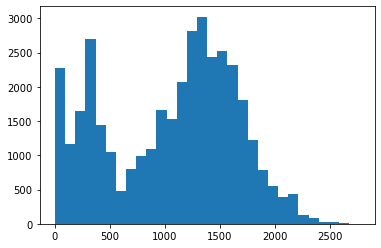

In [53]:
plt.hist(df[df.gps_height>0].gps_height,bins=30)

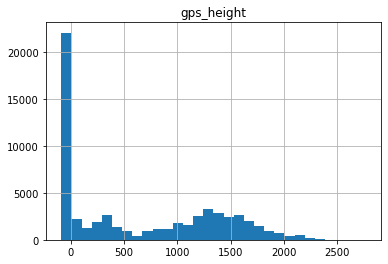

In [24]:
df.hist(column="gps_height",bins=30);#yeah going mean here minus the zeros it is clear the data has a srt of bell curve to it

In [25]:
height_mean=df.gps_height.mean()
height_mean

668.297239057239

In [26]:
df.gps_height.replace(0,height_mean,inplace=True)

In [27]:
df.gps_height

0        1390.000000
1        1399.000000
2         686.000000
3         263.000000
4         668.297239
            ...     
59395    1210.000000
59396    1212.000000
59397     668.297239
59398     668.297239
59399     191.000000
Name: gps_height, Length: 59400, dtype: float64

### next is contruction year

In [28]:
median_year=df.construction_year.median()
median_year#seems reasonable

1986.0

In [29]:
df.construction_year.replace(0,median_year,inplace=True)

Knn for these values instead, Multiples columns

In [30]:
df.construction_year

0        1999
1        2010
2        2009
3        1986
4        1986
         ... 
59395    1999
59396    1996
59397    1986
59398    1986
59399    2002
Name: construction_year, Length: 59400, dtype: int64

Lets try this binning thing out-Still working on binning these two colmuns installer and funder

In [31]:
temp_df=df.drop(["funder","installer"],axis=1)

In [32]:
temp_df=temp_df.fillna("unknown")

In [33]:
temp_df, encoders=pfs.ohe_all_categorical_features(temp_df)
# encoded_temp2=pd.DataFrame(encoded_temp)
temp_df.fillna("unknown")

,gps_height,longitude,latitude,region_code,district_code,construction_year,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,Arusha,Dar es Salaam,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga,Arusha Rural,Arusha Urban,Babati,Bagamoyo,Bahi,Bariadi,Biharamulo,Bukoba Rural,Bukoba Urban,Bukombe,Bunda,Chamwino,Chato,Chunya,Dodoma Urban,Geita,Hai,Hanang,Handeni,Igunga,Ilala,Ileje,Ilemela,Iramba,Iringa Rural,Kahama,Karagwe,Karatu,Kasulu,Kibaha,Kibondo,Kigoma Rural,Kigoma Urban,Kilindi,Kilolo,Kilombero,Kilosa,Kilwa,Kinondoni,Kisarawe,Kishapu,Kiteto,Kondoa,Kongwa,Korogwe,Kwimba,Kyela,Lindi Rural,Lindi Urban,Liwale,Longido,Ludewa,Lushoto,Mafia,Magu,Makete,Manyoni,Masasi,Maswa,Mbarali,Mbeya Rural,Mbinga,Mbozi,Mbulu,Meatu,Meru,Misenyi,Missungwi,Mkinga,Mkuranga,Monduli,Morogoro Rural,Morogoro Urban,Moshi Rural,Moshi Urban,Mpanda,Mpwapwa,Mtwara Rural,Mtwara Urban,Mufindi,Muheza,Muleba,Musoma Rural,Mvomero,Mwanga,Nachingwea,Namtumbo,Nanyumbu,Newala,Ngara,Ngorongoro,Njombe,Nkasi,Nyamagana,Nzega,Pangani,Rombo,Rorya,Ruangwa,Rufiji,Rungwe,Same,Sengerema,Serengeti,Shinyanga Rural,Shinyanga Urban,Siha,Sikonge,Simanjiro,Singida Rural,Singida Urban,Songea Rural,Songea Urban,Sumbawanga Rural,Sumbawanga Urban,Tabora Urban,Tandahimba,Tanga,Tarime,Temeke,Tunduru,Ukerewe,Ulanga,Urambo,Uyui,False,True,unknown,Company,None,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority,unknown,False,True,unknown,afridev,cemo,climax,gravity,india mark ii,india mark iii,ksb,mono,nira/tanira,other,other - mkulima/shinyanga,other - play pump,other - rope pump,other - swn 81,submersible,swn 80,walimi,windmill,never pay,other,pay annually,pay monthly,pay per bucket,pay when scheme fails,unknown,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown,dry,enough,insufficient,seasonal,unknown,dam,hand dtw,lake,machine dbh,other,rainwater harvesting,river,shallow well,spring,unknown,cattle trough,communal standpipe,communal standpipe multiple,dam,hand pump,improved spring,other
0,1390.000000,34.938093,-9.856322,11,5,1999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1399.000000,34.698766,-2.147466,20,2,2010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [34]:
X=temp_df

In [35]:
target_df=pd.read_csv(path+'training_set_labels.csv')
target_df

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [36]:
target_df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Still got that imbalance lets fix that

now label encode the data so we can use it

In [37]:
from sklearn.preprocessing import LabelEncoder
sle = LabelEncoder()
status_encoded = sle.fit_transform(target_df['status_group'])
status_df=pd.DataFrame(status_encoded)
status_encoded_map = {index: label for index, label in 
                                       enumerate(sle.classes_)}

In [38]:
status_encoded_map

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

In [39]:
y=status_df

In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=2020)

In [41]:
X_train.values

array([[ 6.68297239e+02,  3.30375547e+01, -2.41128938e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.22800000e+03,  3.02541708e+01, -4.53004463e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.68297239e+02,  3.15154462e+01, -3.33561986e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.68297239e+02,  3.29409203e+01, -9.16637470e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.29300000e+03,  3.50099048e+01, -1.09388342e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.68297239e+02,  3.42142769e+01, -8.71236151e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [42]:
sm=SMOTE(sampling_strategy="minority",random_state=2020)
X_train_smote, y_train_smote =sm.fit_sample(X_train.values, y_train)

In [43]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=3)

In [44]:
dt_yhat=dt.predict(X_test)

In [45]:
dt_prob=dt.predict_proba(X_test)

In [46]:
dt.score(X_test,y_test)

0.2957575757575758

In [57]:
print(classification_report(y_test,dt_yhat))

              precision    recall  f1-score   support

           0       0.87      0.13      0.22      8010
           1       0.10      0.94      0.17      1152
           2       0.92      0.41      0.56      5688

    accuracy                           0.30     14850
   macro avg       0.63      0.49      0.32     14850
weighted avg       0.83      0.30      0.35     14850



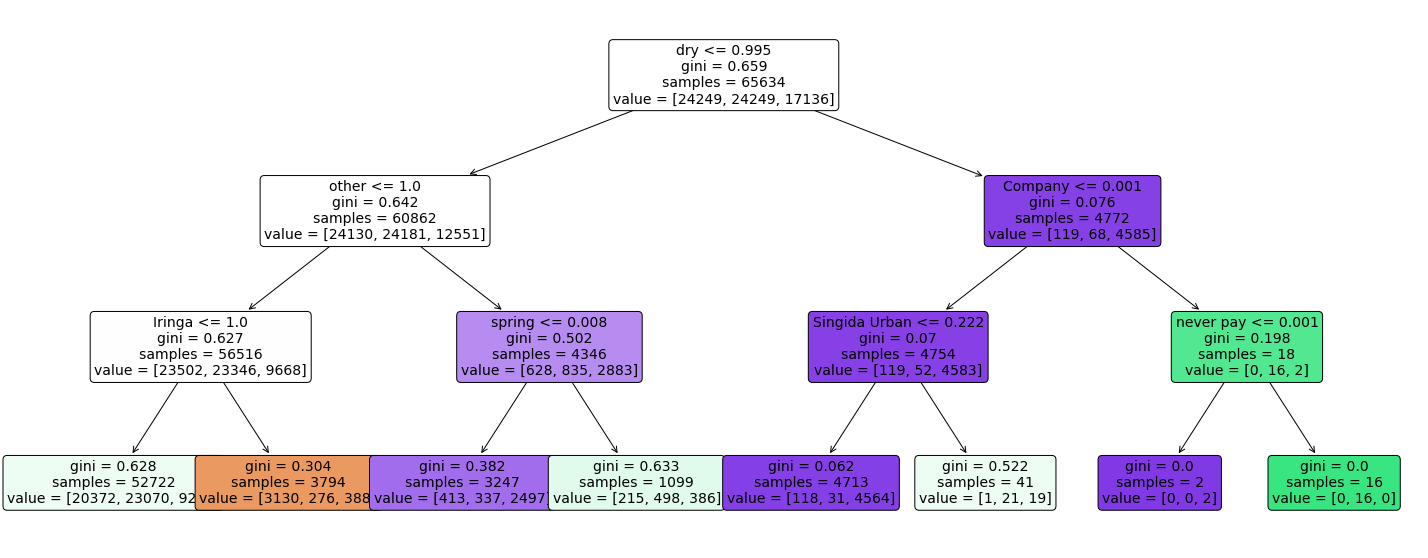

In [58]:
useful_viz.show_tree(dt,X_train);

In [59]:
dt_prob

array([[0.38640416, 0.43757824, 0.1760176 ],
       [0.38640416, 0.43757824, 0.1760176 ],
       [0.82498682, 0.07274644, 0.10226674],
       ...,
       [0.38640416, 0.43757824, 0.1760176 ],
       [0.38640416, 0.43757824, 0.1760176 ],
       [0.38640416, 0.43757824, 0.1760176 ]])

In [60]:
roc_auc_score(y_test,dt_prob, multi_class="ovo")

IndexError: too many indices for array

In [61]:
roc_auc_score(y_test,dt_yhat,multi_class="ovr")

AxisError: axis 1 is out of bounds for array of dimension 1

In [63]:
rf=RandomForestClassifier()
rf.fit(X_train_smote,y_train_smote)

<ipython-input-63-610705bb1da0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_smote,y_train_smote)


RandomForestClassifier()

In [64]:
rf_yhat=rf.predict(X_test)

In [65]:
rf_prob=rf.predict_proba(X_test)

In [66]:
rf.score(X_test,y_test)

0.787946127946128

In [67]:
rf_prob=rf_prob.reshape(1,-1)

In [78]:
print(classification_report(y_test,rf_yhat))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      8010
           1       0.46      0.46      0.46      1152
           2       0.82      0.77      0.79      5688

    accuracy                           0.79     14850
   macro avg       0.70      0.69      0.70     14850
weighted avg       0.79      0.79      0.79     14850



In [68]:
roc_auc_score(y_test,rf_prob, multi_class="ovo",labels=status_encoded_map)

ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [69]:
bg=BaggingClassifier()
bg.fit(X_train_smote,y_train_smote)

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier()

In [70]:
bg_yhat=bg.predict(X_test)

In [72]:
print(classification_report(y_test,bg_yhat))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      8010
           1       0.44      0.46      0.45      1152
           2       0.82      0.74      0.78      5688

    accuracy                           0.78     14850
   macro avg       0.69      0.68      0.68     14850
weighted avg       0.78      0.78      0.78     14850



In [73]:
bg.score(X_test,y_test)

0.7762962962962963

In [74]:
adb=AdaBoostClassifier()
adb.fit(X_train_smote,y_train_smote)

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()

In [75]:
abd_yhat=adb.predict(X_test)

In [76]:
print(classification_report(y_test,abd_yhat))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      8010
           1       0.24      0.52      0.33      1152
           2       0.80      0.56      0.66      5688

    accuracy                           0.66     14850
   macro avg       0.59      0.61      0.58     14850
weighted avg       0.72      0.66      0.68     14850



In [77]:
adb.score(X_test,y_test)

0.6643771043771044